# Classification and Regression Trees
>  Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp, Ensemble Learning]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Machine Learning with Tree-Based Models in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 15)

## Decision tree for classification

### Train your first classification tree

<div class=""><p>In this exercise you'll work with the <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data" target="_blank" rel="noopener noreferrer">Wisconsin Breast Cancer Dataset</a> from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (<code>radius_mean</code>) and its mean number of concave points (<code>concave points_mean</code>).</p>
<p>The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to <code>X_train</code> and <code>X_test</code>, while the arrays of labels are assigned to <code>y_train</code> and <code>y_test</code> where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called <code>SEED</code> which is set to 1.</p></div>

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/04-machine-learning-with-tree-based-models-in-python/datasets/wbc.csv')

In [6]:
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis']
y = y.map({'M':1, 'B':0})

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Instructions
<ul>
<li><p>Import <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code>.</p></li>
<li><p>Instantiate a <code>DecisionTreeClassifier</code> <code>dt</code> of maximum depth equal to 6. </p></li>
<li><p>Fit <code>dt</code> to the training set.</p></li>
<li><p>Predict the test set labels and assign the result to <code>y_pred</code>.</p></li>
</ul>

In [53]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth = 6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


**You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.**

### Evaluate the classification tree

<div class=""><p>Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.</p>
<p>The trained model <code>dt</code> from the previous exercise is loaded in your workspace along with the test set features matrix <code>X_test</code> and the array of labels <code>y_test</code>.</p></div>

Instructions
<ul>
<li><p>Import the function <code>accuracy_score</code> from <code>sklearn.metrics</code>.</p></li>
<li><p>Predict the test set labels and assign the obtained array to <code>y_pred</code>.</p></li>
<li><p>Evaluate the test set accuracy score of <code>dt</code> by calling <code>accuracy_score()</code> and assign the value to <code>acc</code>.</p></li>
</ul>

In [54]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


**Using only two features, your tree was able to achieve an accuracy of 89%!**

### Logistic regression vs classification tree

<div class=""><p>A classification tree divides the feature space into <strong>rectangular regions</strong>. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.</p>
<p>We have written a custom function called <code>plot_labeled_decision_regions()</code> that you can use to plot the decision regions of a list containing two trained classifiers. You can type <code>help(plot_labeled_decision_regions)</code> in the IPython shell to learn more about this function. </p>
<p><code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>, the model <code>dt</code> that you've trained in an earlier <a href="https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=2" target="_blank" rel="noopener noreferrer">exercise</a> , as well as the function <code>plot_labeled_decision_regions()</code> are available in your workspace.</p></div>

In [74]:
#@title ⠀ { display-mode: "form" }
from mlxtend.plotting import plot_decision_regions
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

Instructions
<ul>
<li><p>Import  <code>LogisticRegression</code> from <code>sklearn.linear_model</code>.</p></li>
<li><p>Instantiate a <code>LogisticRegression</code> model and assign it to <code>logreg</code>.</p></li>
<li><p>Fit <code>logreg</code> to the training set.</p></li>
<li><p>Review the plot generated by <code>plot_labeled_decision_regions()</code>.</p></li>
</ul>

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


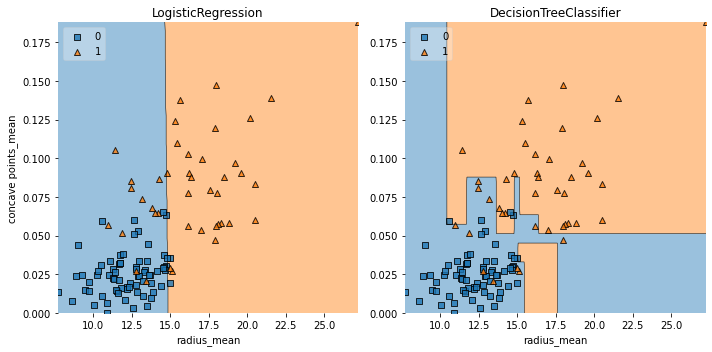

In [75]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

**Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.**

### Classification tree Learning

### Growing a classification tree

<p>In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the following is <strong>not</strong> one of these rules?</p>

<pre>
Possible Answers

The existence of a node depends on the state of its predecessors.

The impurity of a node can be determined using different criteria such as entropy and the gini-index.

When the information gain resulting from splitting a node is null, the node is declared as a leaf.

<b>When an internal node is split, the split is performed in such a way so that information gain is minimized.</b>

</pre>

**It's quite the contrary! Actually, splitting an internal node always involves maximizing information gain!**

### Using entropy as a criterion

<div class=""><p>In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.</p>
<p><code>X_train</code> as well as the array of labels <code>y_train</code> are available in your workspace.</p></div>

Instructions
<ul>
<li><p>Import <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code>.</p></li>
<li><p>Instantiate a <code>DecisionTreeClassifier</code> <code>dt_entropy</code> with a maximum depth of 8.</p></li>
<li><p>Set the information criterion to <code>'entropy'</code>. </p></li>
<li><p>Fit <code>dt_entropy</code> on the training set.</p></li>
</ul>

In [76]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth = 8, criterion ='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

**In the next exercise, you'll compare the accuracy of dt_entropy to the accuracy of a another tree trained using the gini-index as the information criterion.**

### Entropy vs Gini index

<div class=""><p>In this exercise you'll compare the test set accuracy of <code>dt_entropy</code> to the accuracy of another tree named <code>dt_gini</code>. The tree <code>dt_gini</code> was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword <code>'gini'</code>.</p>
<p><code>X_test</code>, <code>y_test</code>, <code>dt_entropy</code>, as well as <code>accuracy_gini</code> which corresponds to the test set accuracy achieved by <code>dt_gini</code> are available in your workspace.</p></div>

In [86]:
#@title ⠀ { display-mode: "form" }
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Instructions
<ul>
<li>Import <code>accuracy_score</code> from <code>sklearn.metrics</code>.</li>
<li>Predict the test set labels of <code>dt_entropy</code> and assign the result to <code>y_pred</code>.</li>
<li>Evaluate the test set accuracy of <code>dt_entropy</code> and assign the result to <code>accuracy_entropy</code>.</li>
<li>Review <code>accuracy_entropy</code> and <code>accuracy_gini</code>.</li>
</ul>

In [88]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using the gini index:  0.8859649122807017


**Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.**

## Decision tree for regression

### Train your first regression tree

<div class=""><p>In this exercise, you'll train a regression tree to predict the <code>mpg</code> (miles per gallon) consumption of cars in the <a href="https://www.kaggle.com/uciml/autompg-dataset" target="_blank" rel="noopener noreferrer">auto-mpg dataset</a> using all the six available features.</p>
<p>The dataset is processed for you and is split to 80% train and 20% test. The features matrix <code>X_train</code> and the array <code>y_train</code> are available in your workspace.</p></div>

In [96]:
df_train = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/04-machine-learning-with-tree-based-models-in-python/datasets/auto_train.csv')
X_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]

Instructions
<ul>
<li>Import <code>DecisionTreeRegressor</code>  from <code>sklearn.tree</code>.</li>
<li>Instantiate a  <code>DecisionTreeRegressor</code> <code>dt</code> with maximum depth 8 and <code>min_samples_leaf</code> set to 0.13.</li>
<li>Fit <code>dt</code> to the training set.</li>
</ul>

In [99]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

**In the next exercise, you'll evaluate dt's performance on the test set.**

### Evaluate the regression tree

<div class=""><p>In this exercise, you will evaluate the test set performance of <code>dt</code> using the  Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).</p>
<p>The features matrix <code>X_test</code>, the array <code>y_test</code>, as well as the decision tree regressor <code>dt</code> that you trained in the previous exercise are available in your workspace.</p></div>

In [100]:
df_test = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/04-machine-learning-with-tree-based-models-in-python/datasets/auto_test.csv')
X_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]

Instructions
<ul>
<li>Import the function <code>mean_squared_error</code> as <code>MSE</code>  from <code>sklearn.metrics</code>.</li>
<li>Predict the test set labels and assign the output to <code>y_pred</code>.</li>
<li>Compute the test set MSE by calling <code>MSE</code> and assign the result to <code>mse_dt</code>.</li>
<li>Compute the test set RMSE and assign it to <code>rmse_dt</code>.</li>
</ul>

In [101]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


**In the next exercise, you'll compare the test-set RMSE of dt to that of a linear regression model trained on the same dataset.**

### Linear regression vs regression tree

<div class=""><p>In this exercise, you'll compare the test set RMSE of <code>dt</code> to that achieved by a linear regression model. We have already instantiated a linear regression model <code>lr</code> and trained it on the same dataset as <code>dt</code>. </p>
<p>The features matrix <code>X_test</code>, the array of labels  <code>y_test</code>, the trained linear regression model <code>lr</code>, <code>mean_squared_error</code> function which was imported under the alias <code>MSE</code> and <code>rmse_dt</code> from the previous exercise are available in your workspace.</p></div>

In [103]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Instructions
<ul>
<li><p>Predict test set labels using the linear regression model (<code>lr</code>) and assign the result to <code>y_pred_lr</code>.</p></li>
<li><p>Compute the test set MSE and assign the result to <code>mse_lr</code>. </p></li>
<li><p>Compute the test set RMSE and assign the result to <code>rmse_lr</code>.</p></li>
</ul>

In [104]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


**You're on your way to master decision trees.**